In [1]:
import numpy as np
import pandas as pd

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [3]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


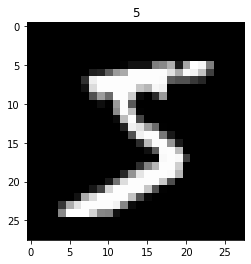

In [5]:
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

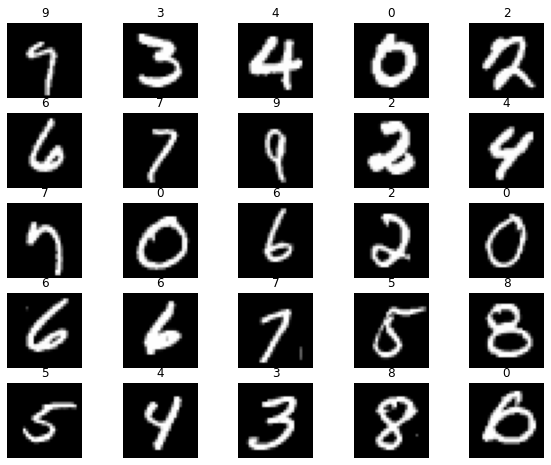

In [6]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1ea79db1e50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1ea79db1d00>}

In [16]:
data = iter(loaders['train'])
samples,labels = next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([100, 1, 28, 28])
number of labels torch.Size([100])


In [21]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

In [18]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(32 * 5 * 5, 10) 
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

In [22]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [24]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders['train']):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in loaders['test']:
                images = Variable(images)
                
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                
                total += labels.size(0)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

Iteration: 500. Loss: 0.3146739602088928. Accuracy: 91.44999694824219
Iteration: 1000. Loss: 0.2743070721626282. Accuracy: 93.0199966430664
Iteration: 1500. Loss: 0.20880788564682007. Accuracy: 94.55000305175781
Iteration: 2000. Loss: 0.15260612964630127. Accuracy: 95.69999694824219
Iteration: 2500. Loss: 0.20795460045337677. Accuracy: 95.94000244140625
Iteration: 3000. Loss: 0.13870330154895782. Accuracy: 96.05000305175781
